## Observations and Insights 

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
study_results_merged = study_results.merge(mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
display(study_results_merged)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
display(pd.DataFrame({
    "Number of Mice": len(study_results_merged["Mouse ID"].value_counts()),
    "Number of Drug Regimen": len(study_results_merged["Drug Regimen"].unique()),
    "Number of Timepoints": len(study_results_merged["Timepoint"].unique())}, 
    index=["Before Cleanup"]))

,Number of Mice,Number of Drug Regimen,Number of Timepoints
Before Cleanup,249,10,10


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
## .duplicated(keep=False) returns a mask for the given Series with all duplicated entries
duplicate_rows = study_results_merged[study_results_merged[["Mouse ID", "Timepoint"]].duplicated(keep=False)]
duplicate_mouse_ID = duplicate_rows["Mouse ID"].unique()

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
## Use .isin function to filter only for the duplicate mouse IDs
duplicate_mouseID_data = study_results_merged[study_results_merged["Mouse ID"].isin(duplicate_mouse_ID)]
display(duplicate_mouseID_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_cleaned = study_results_merged.drop(duplicate_mouseID_data.index)

In [7]:
# Checking the number of mice in the clean DataFrame.
display(pd.DataFrame({
    "Number of Mice": len(study_results_cleaned["Mouse ID"].value_counts()),
    "Number of Drug Regimen": len(study_results_cleaned["Drug Regimen"].unique()),
    "Number of Timepoints": len(study_results_cleaned["Timepoint"].unique())}, 
    index=["After Cleanup"]))

,Number of Mice,Number of Drug Regimen,Number of Timepoints
After Cleanup,248,10,10


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = study_results_cleaned.groupby(by="Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
volume_mean = regimen_group["Tumor Volume (mm3)"].mean()
volume_median = regimen_group["Tumor Volume (mm3)"].median()
volume_var = regimen_group["Tumor Volume (mm3)"].var()
volume_std = regimen_group["Tumor Volume (mm3)"].std()
volume_sem = regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
display(pd.DataFrame({
    "Mean Volume (mm3)": volume_mean, 
    "Median Volume (mm3)": volume_median,
    "variance Volume (mm6)": volume_var,
    "std-dev Volume (mm3)": volume_std,
    "std-err": volume_sem}))

,Mean Volume (mm3),Median Volume (mm3),variance Volume (mm6),std-dev Volume (mm3),std-err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
study_results_cleaned.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

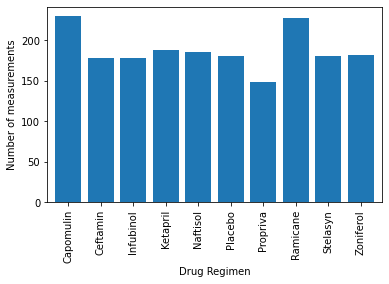

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_group["Drug Regimen"].count().plot(kind="bar", ylabel="Number of measurements", width=0.8)
plt.subplots_adjust(bottom=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


Text(0, 0.5, 'Number of measurements')

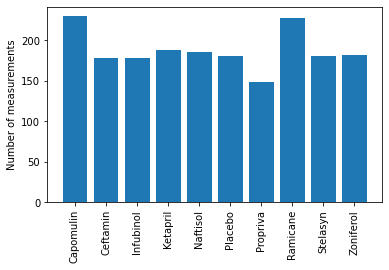

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
xticks = regimen_group["Drug Regimen"].count().index
bar_height = regimen_group["Drug Regimen"].count().values

# Figure and axes
fig, ax = plt.subplots(1,1, num=2) 
fig.subplots_adjust(bottom=0.2)    # xtick labels are too long with default bottom value
ax.bar(xticks, bar_height, width=0.8)
ax.set_xticklabels(xticks, rotation=90)
ax.set_ylabel("Number of measurements")

<AxesSubplot:ylabel='Sex'>

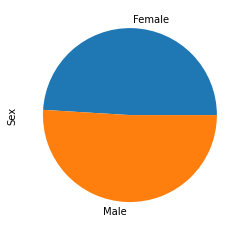

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure()
gender_group = study_results_cleaned.groupby(by="Sex")
gender_group["Sex"].count().plot(kind="pie")


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
